In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/shikharghimire/Desktop/TimeSeries-Practice/data/airline_passengers.csv',index_col = 'Month',parse_dates = True)

In [3]:
data.index.freq = 'MS'  #Specifying frequency as MS because every data point starts from the first day of the month

In [4]:
data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
data.tail() #Data goes upto december 1960

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [6]:
#Let's split the training and testing data
train_data = data.iloc[:109] #training data upto 108 rows. Doesn't include 109
test_data = data.iloc[108:] #After 108 index, put everything as test set

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [8]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend = 'mul',
                                    seasonal = 'mul',seasonal_periods = 12).fit() #periods = 12 because there are 12 entries per seasonal period

In [9]:
test_prediction = fitted_model.forecast(36) #If you want to forecast into 1 year, you use 12 inside the .forecast(), 
                                            #if you want 2 years in, you type 24,  36 for. 3 years


In [10]:
test_prediction #Forecast prediction

1958-02-01    339.142634
1958-03-01    399.274989
1958-04-01    394.218973
1958-05-01    402.533277
1958-06-01    473.136451
1958-07-01    521.811719
1958-08-01    514.548792
1958-09-01    446.242071
1958-10-01    385.443332
1958-11-01    339.653535
1958-12-01    381.452201
1959-01-01    401.214961
1959-02-01    387.155207
1959-03-01    455.800526
1959-04-01    450.028728
1959-05-01    459.520092
1959-06-01    540.118589
1959-07-01    595.684836
1959-08-01    587.393693
1959-09-01    509.416759
1959-10-01    440.010716
1959-11-01    387.738437
1959-12-01    435.454558
1960-01-01    458.015142
1960-02-01    441.964941
1960-03-01    520.328409
1960-04-01    513.739495
1960-05-01    524.574556
1960-06-01    616.583417
1960-07-01    680.016202
1960-08-01    670.551279
1960-09-01    581.535116
1960-10-01    502.303228
1960-11-01    442.630739
1960-12-01    497.102053
1961-01-01    522.856549
Freq: MS, dtype: float64

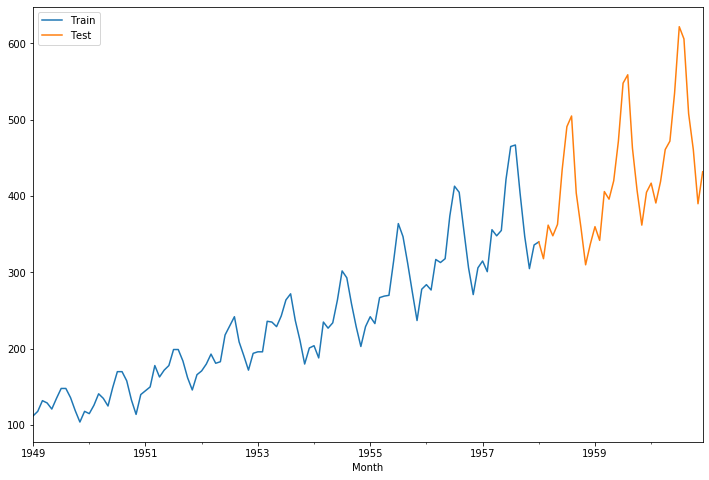

In [11]:
#Let's plot the prediction value with the real values that are stored in the 'test data' variable
train_data['Thousands of Passengers'].plot(legend=True,label='Train',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='Test',figsize=(12,8))

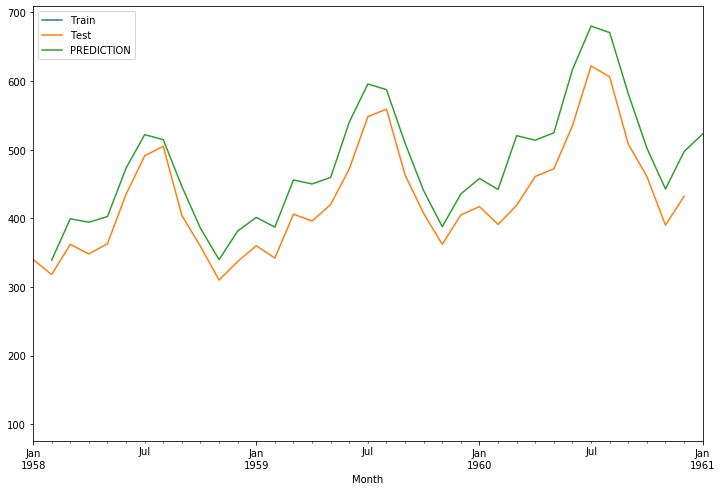

In [12]:
#Let's plot the prediction value with the real values that are stored in the 'test data' variable
train_data['Thousands of Passengers'].plot(legend=True,label='Train',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='Test',figsize=(12,8))

#Let's see what the real prediction looks like
test_prediction.plot(legend=True,label = 'PREDICTION',xlim = ['1958-01-01','1961-01-01']) #xlim is to see the subset

- In the very next lecture, we are going to talk about the evaluation metric. We can see visually that we are performing well but we need to quanitfy how good it was numerically (Check the notecopy for it)

In [13]:
#Let's evaluate the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [16]:
mean_absolute_error(test_data,test_prediction)  

#In order to get the idea of what the value really signifies is we should compare it to the average values for our test data
test_data.describe() #This shows the average value
#Mean is 428.5 and. standard deviation of 79.3

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [17]:
#Mean squared error
mean_squared_error(test_data,test_prediction) 

5613.746549708241

In [19]:
#Root mean squared error
np.sqrt(mean_squared_error(test_data,test_prediction)) #Our root mean square error is actually less than the standard deviation
                                                        #of our true data which means we are performing actually quitew well

74.92493943746796

In [21]:
#Let's say we are satisfied with this model and want to predict in the future of the date that we do not have yet
#Let's again fit the whole dataset into the model
final_model = ExponentialSmoothing(data['Thousands of Passengers'],trend = 'mul',seasonal = 'mul',seasonal_periods = 12).fit()



In [23]:
forecast_predictions = final_model.forecast(36) #Forecasting 3 years into the future

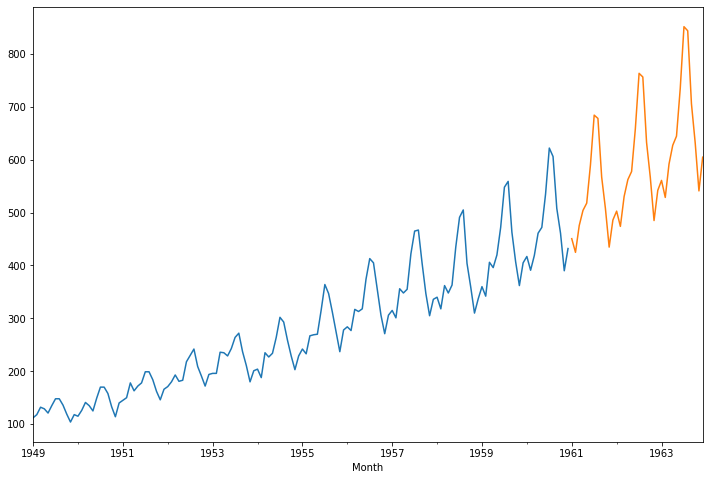

In [25]:
data['Thousands of Passengers'].plot(figsize=(12,8))  #Lets plot the original dataframe
forecast_predictions.plot()

In [26]:
#We have talked about the difference between stationary and non stationary data
df2 = pd.read_csv('/Users/shikharghimire/Desktop/TimeSeries-Practice/data/samples.csv',index_col=0,parse_dates=True)

In [27]:
df2.head() 

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


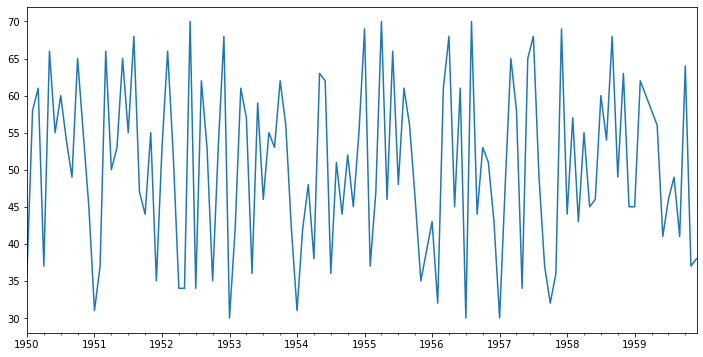

In [29]:
df2['a'].plot(figsize=(12,6))#This data (col a) is called stationary data because it doesnt have trend nor seasonality

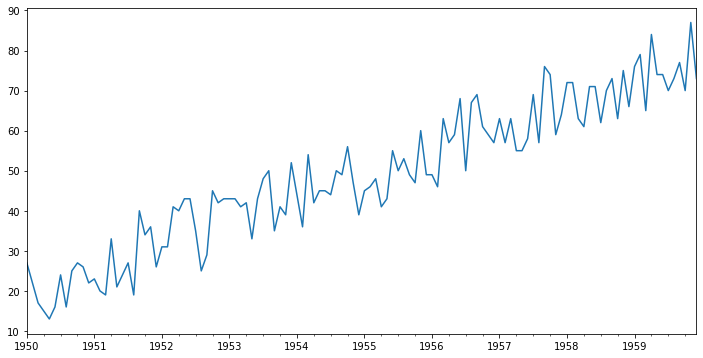

In [31]:
df2['b'].plot(figsize=(12,6)) #This is non stationary data as it clearly has seasonality 

In [35]:
#What's interesting is that non stationary data can be made to look like stationary data using differencing
#Please read what stationary and non stationary data is from notecopy
from statsmodels.tsa.statespace.tools import diff

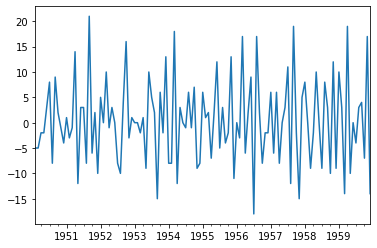

In [37]:
diff(df2['b'],k_diff=1).plot() #As we can see the non stationary data we had before, we no longer see trend o=
#or seasonality

In [32]:
# In the next lecture, we are gonna learn about testing the stationary data. Sometimes, it can be decieving and hard to tell
#specially when the trend is not as steep or as sallow as we expected

In [ ]:
#We will learn statistical test that will report back to you if quantitavely the data in time series is stationary. or not
